# Machine Learning for Classification

We will use logistic regression to predict churn

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'


In [3]:
!wget $data -O data-week-3.csv 

--2025-11-16 18:32:41--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K   695KB/s    in 1.4s    

2025-11-16 18:32:43 (695 KB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [4]:
df = pd.read_csv('data-week-3.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [6]:
# To display all of them simultaneously, we can use the transpose function. This will switch the rows to become columns and the columns to become rows.
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [7]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

We notice a ‘Seniorcitizen’ is represented as a numerical value (0 or 1) rather than a string (‘yes’ or ‘no’), and ‘totalcharges’ is currently classified as an object but should be a numerical data type.


In [8]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [9]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [10]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [11]:
#fill null or empty records with zeros
df.totalcharges = df.totalcharges.fillna(0)

In [12]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [13]:
# convert churn to zeros and one
df.churn = (df.churn == 'yes').astype(int)


In [14]:
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

# Setting up the validation framework

Perform the train/validation/test split with Scikit-Learn

You can utilize the train_test_split function from the sklearn.model_selection package to automate the splitting of your data into training, validation, and test sets. Before you can use it, make sure to import it first as follows



 
# To see the documentation
train_test_split?

The train_test_split function divides the dataframe into two parts, with 80% for the full train set and 20% for the test set. We use random_state=1 to ensure that the results are reproducible.


In [15]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
len(df_full_train), len(df_test)

(5634, 1409)

To obtain three sets (train, validation, and test), we should perform the split again with the full train set. However, this time, we want to allocate 60% for the train set and 20% for the validation set. To calculate the validation set size, we can’t use test_size=0.2 as before because we are dealing with 80% of the data. Instead, we need to determine 20% of 80%, which is equivalent to 25%. Therefore, for the validation set, we should use test_size=0.25.

In [16]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val)

(4225, 1409)

We see that validation set and test set have the same size now.

In [17]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

To reset the indices, you can use the reset_index function with the drop=True parameter to drop the old index column. Here’s how you can do it:

In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

Now, we need to extract our target variable, which is ‘y' (churn). Here’s how it looks for the four datasets

In [19]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

Certainly, to prevent accidental use of the “churn” variable when building a model, we should remove it from our dataframes. Here’s how you can remove the “churn” column from each of the four datasets

In [20]:
del df_train['churn']
del df_val['churn']
del df_test['churn'] 

After performing these operations, the “churn” variable will be removed from your datasets, and you can proceed with building your model without the risk of accidentally using it.

# EDA – Exploratory Data Analysis


EDA – Exploratory Data Analysis
* Checking missing values
* Looking at the target variable (churn)
* Looking at numerical and categorical variables

Checking missing values

The following snippet indicates that the dataset ‘df_full_train’ contains no missing values

In [21]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

## Looking at the target variable (churn)


In [22]:
df_full_train.churn

1814    0
5946    1
3881    0
2389    0
3676    0
       ..
905     1
5192    0
3980    1
235     1
5157    0
Name: churn, Length: 5634, dtype: int64

In [23]:
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

There is information about a total of 5634 customers. Among these, 1521 are dissatisfied customers (churning), while the remaining 4113 are satisfied customers (not churning). Understanding the distribution of your target variable is an essential step in any data analysis or modeling task, as it provides valuable insights into the data’s class balance, which can influence modeling decisions and evaluation metrics.

Using the value_counts function with the normalize=True parameter provides the churn rate, which represents the proportion of churning customers relative to the total number of customers. In our case, we’ve calculated that the churn rate is almost 27%.

In [24]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [25]:
# find the mean in 2 decimal place, call it the global churn rate before building the model
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)


np.float64(0.27)

We realize that it’s the same value as the churn rate. Let’s explore why this works here.

The formula for the mean is given by:

mean=(1/n)∑x

In this case, where x∈{0,1}, it simplifies to:

mean=(number of ones)/n​

And that is indeed the churn rate. This principle holds true for all binary datasets, because the mean of binary values corresponds directly to the proportion of ones in the dataset, which is essentially the churn rate in this context

## Looking at numerical and categorical variables

To identify the categorical and numerical variables in your dataset, you can use the dtypes function as mentioned earlier. Here’s how you can use it in general:

In [26]:
numerical_vars = df.select_dtypes(include=['int64', 'float64'])
categorical_vars = df.select_dtypes(include=['object'])
 
print("Numerical Variables:")
print(numerical_vars.columns)
 
print("\nCategorical Variables:")
print(categorical_vars.columns)

Numerical Variables:
Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'churn'], dtype='object')

Categorical Variables:
Index(['customerid', 'gender', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object')


This code will help you separate and display the numerical and categorical variables in your dataset, making it easier to understand the data’s structure and plan your data analysis accordingly. Let’s look at our dataframe.


In [27]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

As we know, there are three numerical variables: tenure, monthly charges, and total charges. Let’s define numerical and categorical columns.

In [28]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [29]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [30]:
# Removing 'customerid', 'tenure', 'monthlycharges', 'totalcharges', and 'churn'
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [31]:
# To determine the number of unique values for all the categorical variables, we can use the nunique() function.

df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# Feature importance: Churn rate and risk ratio

Feature importance analysis is a part of exploratory data analysis (EDA) and involves identifying 
which features affect our target variable.

* Churn rate
* Risk ratio
* Mutual information – later

## Churn rate
  
Last time, we examined the global churn rate. Now, we are focusing on the churn rate within different groups. For example, we are interested in determining the churn rate for the gender group.

In [122]:
# Selecting the subset of female customers
df_full_train[df_full_train.gender == 'female']

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
611,4765-oxppd,female,0,yes,yes,9,yes,no,dsl,yes,...,yes,yes,no,no,month-to-month,no,mailed_check,65.00,663.05,1
2890,1732-vhubq,female,1,yes,yes,47,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,no,bank_transfer_(automatic),70.55,3309.25,1
5150,7017-vfuly,female,0,yes,no,2,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,bank_transfer_(automatic),20.10,43.15,0
997,1374-dmzui,female,1,no,no,4,yes,yes,fiber_optic,no,...,no,no,yes,yes,month-to-month,yes,electronic_check,94.30,424.45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5374,8065-ykxkd,female,0,no,no,10,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,74.75,799.65,1
5396,5627-tvbpp,female,0,no,yes,35,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,credit_card_(automatic),20.10,644.50,0
5056,3262-eidhv,female,0,yes,yes,72,yes,yes,dsl,yes,...,yes,yes,yes,yes,two_year,no,credit_card_(automatic),84.70,5893.90,0
2895,7446-sfaoa,female,0,yes,no,37,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,bank_transfer_(automatic),19.85,717.50,0


The following snippet displays the value of the global churn rate. In comparison to that value, we can also calculate the churn rates for the female and male groups. We observe that the female churn rate is slightly higher than the global rate, while the male churn rate is slightly lower than the global rate. This suggests that women are somewhat more likely to churn.



In [124]:
global_churn = df_full_train.churn.mean()
global_churn

np.float64(0.26996805111821087)

In [125]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [126]:
global_churn - churn_female

np.float64(-0.006855983216553063)

In [127]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [128]:
global_churn - churn_male

np.float64(0.006754520462819769)

Let’s check the churn rate of another group (with partner vs. without partner).



In [129]:
df_full_train.partner.value_counts()


partner
no     2932
yes    2702
Name: count, dtype: int64

When examining this group, we notice that customers with partners are significantly less likely to churn. The churn rate for this group is approximately 20.5%, contrasting with the global churn rate of almost 27%. On the other hand, customers without partners have a much higher churn rate compared to the global rate, standing at 33% as opposed to 27%.

In [130]:
global_churn = df_full_train.churn.mean()
global_churn

np.float64(0.26996805111821087)

In [131]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [132]:
global_churn - churn_partner

np.float64(0.06493474245795922)

In [133]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

In [134]:
global_churn - churn_no_partner

np.float64(-0.05984095297455855)

This observation suggests that the partner variable may be more influential for predicting churn than the gender variable.

## Risk ratio
In the context of machine learning and classification, the “risk ratio” typically refers to a statistical measure used to assess the likelihood or probability of a certain event occurring in one group compared to another. It’s a useful concept in various fields, including healthcare, finance, and customer churn analysis.

In the specific context of churn rate, the risk ratio can help you understand the relative risk of churn (i.e., customers leaving) for different groups or segments within your dataset. It can provide insights into which features or factors are associated with a higher or lower risk of churn.

Here’s a simplified explanation of how risk ratio works in the context of churn rate:

* Definition of Risk Ratio: The risk ratio (also known as the relative risk) is defined as the probability of an event occurring in one group divided by the probability of the same event occurring in another group. In the case of churn rate, you’re typically comparing two groups: one group that exhibits a certain characteristic or behavior (e.g., customer has churned) and another group that does not exhibit that characteristic (e.g., customer hasn’t churned).
* Interpretation: A risk ratio greater than 1 suggests that the event (churn in this case) is more likely in the first group compared to the second group. A risk ratio less than 1 suggests the event is less likely in the first group. A risk ratio equal to 1 means there is no difference in risk between the two groups.
* Application: We can use risk ratios to assess the impact of different features or interventions on churn rate. For example, we might calculate the risk ratio of churn for customers who received a promotional offer versus those who did not. If the risk ratio is significantly greater than 1, it indicates that the promotional offer had a positive impact on reducing churn.
* Statistical Significance: It’s important to also consider statistical significance when interpreting risk ratios. Statistical tests such as chi-squared tests or confidence intervals can help determine if the observed differences in churn rates are statistically significant.
So the risk ratio is a valuable tool for assessing the impact of different factors or features on churn rate in classification tasks. It helps you quantify and compare the relative risk of churn between different groups, providing insights that can inform decision-making and strategies for reducing churn.

Let’s compare the risk ratio for churning between people with partners and those without partners.

In [135]:
churn_no_partner / global_churn



np.float64(1.2216593879412643)

In [136]:
churn_partner / global_churn


np.float64(0.7594724924338315)

This demonstrates that the churn rate for people without partners is 22% higher, whereas for people with partners, it is 24% lower than the global churn rate.

Let’s take the data and group it by gender, and for each variable within the gender group, let’s calculate the average churn rate within that group and calculate the difference and risk. We can perform this analysis for all the variables, not just the gender variable.

The SQL query would look like:

SELECT
gender,
AVG(churn),
AVG(churn) - global_churn AS diff,
AVG(churn) / global_churn AS risk
FROM
date
GROUP BY
gender;



In [137]:
df_full_train.groupby('gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [138]:
df_full_train.groupby('gender').churn.agg(['mean', 'count'])

,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [139]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn
df_group['risk'] = df_group['mean'] / global_churn
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


This table is interesting, but it only displays information for the gender groups. Now, let’s extend this analysis to include all the categorical columns.

In [140]:
from IPython.display import display
 
for c in categorical:
    #print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## Summary
This article has covered the difference and the risk ratio as two important tools for assessing feature importance.

Concerning the difference, we calculate it by subtracting the group’s churn rate from the global churn rate. Here, we are primarily interested in significant differences, unlike in the gender case. Values for this difference smaller than 0 indicate a higher likelihood to churn, while values larger than 0 indicate a lower likelihood to churn.

As for the risk ratio, it is obtained by dividing the group’s churn rate by the global churn rate. Values greater than 1 suggest a higher likelihood to churn, whereas values less than 1 suggest a lower likelihood to churn.

In essence, both difference and risk ratio convey similar information but in different ways, providing insights into the importance of features with respect to churn prediction.

We observe certain categories in which people tend to churn more or less frequently compared to the global average. These are the types of variables we are interested in and want to use in machine learning algorithms. While it’s informative to see this for individual variables in each table, it would be valuable to have a measure that quantifies the overall importance of each variable.

To determine how we can assess whether the “contract” variable is less or more important than “streamingmovies,” we will proceed with the following steps.

In [36]:
from sklearn.metrics import mutual_info_score

In [37]:
mutual_info_score(df_full_train.churn, df_full_train.contract)


0.0983203874041556

In [38]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.00011748462111432767

In [39]:
mutual_info_score(df_full_train.churn, df_full_train.partner)


0.009967689095400717

In [40]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)
 
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

To arrange this list in such a way that the most important variables come first, we can sort the variables based on their mutual information scores in descending order. This way, the most important variables will appear at the top of the list.

In [41]:
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## Feature importance: Correlation

For measuring feature importance for numerical variables, one common approach is to use the correlation coefficient, specifically Pearson’s correlation coefficient. The Pearson correlation coefficient quantifies the degree of linear dependency between two numerical variables.

The correlation coefficient (often denoted as “r”) has a range of -1 to 1:

A negative correlation (r = -1) indicates a strong inverse relationship, where one variable increases as the other decreases.
A positive correlation (r = 1) indicates a strong positive relationship, where both variables increase together.
An r value close to 0 suggests a weak or no linear relationship between the variables.
The strength of the correlation is indicated by the absolute value of r:

0.0 < |r| < 0.2: Low correlation
0.2 < |r| < 0.5: Moderate correlation
0.6 < |r| < 1.0: Strong correlation
You can calculate the Pearson correlation coefficient between your numerical variables and the target variable (churn) to assess their importance. Higher absolute values of r indicate a stronger linear relationship, which can be interpreted as higher feature importance.

To calculate the Pearson correlation coefficient in Python, you can use the corr() function from pandas:

correlation = df[numerical_vars].corr()['churn']

This will give you a series of correlation values between each numerical variable and the churn variable, and you can sort them in descending order to identify the most important numerical features.

In the context of churn prediction:

* Positive Correlation: A positive correlation between a numerical variable (e.g., tenure) and churn means that as the numerical variable increases (e.g., longer tenure), the likelihood of churn (1) increases.
* Negative Correlation: A negative correlation between a numerical variable (e.g., tenure) and churn means that as the numerical variable increases (e.g., longer tenure), the likelihood of churn (1) decreases.
* Zero Correlation: A correlation close to zero suggests that there is no significant linear relationship between the numerical variable and churn.

  
You can calculate the Pearson correlation coefficient (r) between each numerical variable and the target variable (churn) to assess the feature importance of numerical variables. Higher absolute values of r indicate a stronger linear relationship, which can be interpreted as higher feature importance. This analysis helps you identify which numerical variables have the most impact on churn prediction.

In [43]:
df_full_train[numerical]

,tenure,monthlycharges,totalcharges
1814,12,19.70,258.35
5946,42,73.90,3160.55
3881,71,65.15,4681.75
2389,71,85.45,6300.85
3676,30,70.40,2044.75
...,...,...,...
905,9,100.50,918.60
5192,60,19.95,1189.90
3980,28,105.70,2979.50
235,2,54.40,114.10


In [44]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [45]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [46]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [47]:
df_full_train[df_full_train.tenure > 2].churn.mean()

np.float64(0.22478269658378816)

In [48]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()


np.float64(0.3994413407821229)

In [49]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

Regarding the variable “tenure,” we can observe that the group of customers with the highest likelihood to churn consists of those with a tenure of less than or equal to 2. It has a churn rate of almost 60%.

Let’s look at another example:

In [50]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

np.float64(0.08795411089866156)

In [51]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()


np.float64(0.18340943683409436)

In [52]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

np.float64(0.32499341585462205)

Concerning the variable “monthlycharges,” we can observe that the group of customers with the highest likelihood to churn belongs to the group with monthly charges greater than $50. It has a churn rate of 32.5%.

In [53]:
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient='records')
dicts

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {

## Using DictVectorizer
First, we need to create a new instance of this class. Then, we train our DictVectorizer instance. This involves presenting the data to the DictVectorizer so that it can infer the column names and their corresponding values. Based on this information, it creates the one-hot encoding feature matrix. It’s worth noting that the DictVectorizer is intelligent enough to detect numerical variables and exclude them from one-hot encoding, as they don’t require such encoding.

In [54]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer()
 
dv.fit(dicts)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,True
,sort,True


In [55]:
# Then we need to transform the dictionaries.
dv.transform(dicts)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 200 stored elements and shape (100, 5)>

When using the transform method as shown in the last snippet, it creates a sparse matrix by default. A sparse matrix is a memory-efficient way of encoding data when there are many zeros in the dataset. But we’ll not use sparse matrix here.

In the code of the next snippet, the DictVectorizer returns a regular NumPy array where the first three columns represent the “contract” variable, and the last two columns represent the “gender” variable.

In [56]:
dv = DictVectorizer(sparse=False)
dv.fit(dicts)
 
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [57]:
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

In [59]:
# Let’s bring it all together

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
train_dicts[1]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'no',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 10,
 'monthlycharges': 95.25,
 'totalcharges': 1021.55}

In [60]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dicts)
 
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [61]:
# Short version without long outputs:

from sklearn.feature_extraction import DictVectorizer
 
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
 
dv.fit(train_dicts)
X_train = dv.transform(train_dicts)

In [62]:
X_train.shape

(4225, 45)

When dealing with validation data, we can reuse the same DictVectorizer instance that we created before. Instead of using the fit function followed by the transform function, we only need to apply the transform function to the validation data. This ensures that the transformation process applied to the validation data is consistent with the encoding used for the training data.

In [63]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

# Logistic Regression
As mentioned earlier, classification problems can be categorized into binary problems and multi-class problems. Binary problems are the types of problems that logistic regression is typically used to solve.

In binary classification, the target variable yiyi​ belongs to one of two classes: 0 or 1. These classes are often referred to as “negative” and “positive,” and they represent two mutually exclusive outcomes. In the context of churn prediction, “no churn” and “churn” are examples of binary classes. Similarly, in email classification, “no spam” and “spam” are also binary classes.

That means g(xi) outputs a number from 0 to 1 that we can treat as the probability of xi belonging to the positive class.

Formula:
Linear regression: g(xi)=w0+wTxi → outputs a number −∞..∞∈R

* x0 – bias term
* wT – weights vector
* xi​ – features
Logistic regression: g(xi)=SIGMOID(w0+wTxi) → outputs a number 0..1∈R

sigmoid(z)= 1 / (1+exp(−z))

This function maps any real number z to the range of 0 to 1, making it suitable for modeling probabilities in logistic regression. We’ll use this function to convert a score into a probability.

Let’s see how to implement the sigmoid function and use it. We can create an array with 51 values between -7 and 7 using np.linspace(-7, 7, 51). This is our z in the next snippet.

In [64]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
 
z = np.linspace(-7, 7, 51)
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [65]:
# We can apply this sigmoid function to our array z,…
sigmoid(z)


array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

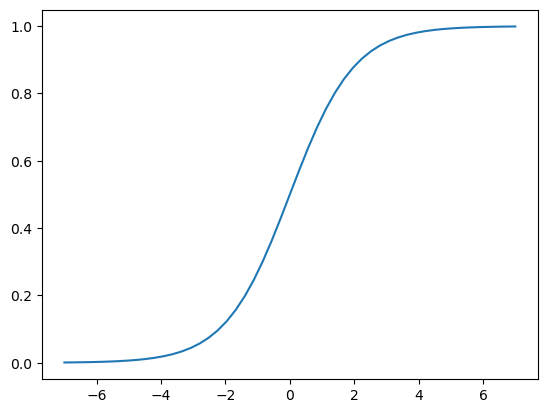

In [66]:
# … but let’s visualize how the graph of the sigmoid function looks.

plt.plot(z, sigmoid(z))

At the end of this article, both implementations are presented for comparison. The first snippet demonstrates the familiar linear regression, while the second snippet illustrates logistic regression. It’s evident that there is essentially only one difference between the two: in logistic regression, the sigmoid function is applied to the result of the linear regression to transform it into a probability value between 0 and 1.

In [67]:
def linear_regression(xi):
    result = w0
     
    for j in range(len(w)):
        result = result + xi[j] * w[j]
     
    return result

In [68]:
def logistic_regression(xi):
    score = w0
     
    for j in range(len(w)):
        score = score + xi[j] * w[j]
     
    result = sigmoid(score)
    return result

Linear regression and logistic regression are called linear models, because dot product in linear algebra is a linear operator. Linear models are fast to use, fast to train.

# Training logistic regression with Scikit-Learn

Training logistic regression with Scikit-Learn
* Train a model with Scikit-Learn
* Apply model to the validation dataset
* Calculate the accuracy

## Train a model with Scikit-Learn
When you want to train a logistic regression model, the process is quite similar to training a linear regression model.



In [70]:
from sklearn.linear_model import LogisticRegression
 
model = LogisticRegression()
model.fit(X_train, y_train)

#You can use the ‘coef_’ attribute to display the weights (coefficients) in a logistic regression model.

model.coef_



/Users/eliewahachaligha/anaconda3/envs/mlzoomcamp/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 4.75114189e-01, -1.74939987e-01, -4.07902746e-01,
        -2.97963673e-02, -7.79321757e-02,  6.26942340e-02,
        -8.90344254e-02, -8.13883516e-02, -3.43179401e-02,
        -7.34106029e-02, -3.35356303e-01,  3.16662186e-01,
        -8.90344254e-02,  3.66828548e-03, -2.58240534e-01,
         1.41597298e-01,  8.91469318e-03,  6.25475109e-02,
        -8.90344254e-02, -8.12416285e-02,  2.65667084e-01,
        -8.90344254e-02, -2.84361201e-01, -2.31217322e-01,
         1.23488779e-01, -1.66176777e-01,  5.84482336e-02,
        -8.70456664e-02, -3.20426285e-02,  7.03795623e-02,
        -5.90198104e-02,  1.41597298e-01, -2.49325841e-01,
         2.15572340e-01, -1.20434364e-01, -8.90344254e-02,
         1.01740247e-01, -7.09295609e-02, -8.90344254e-02,
         5.22354433e-02,  2.13392725e-01, -8.90344254e-02,
        -2.32086843e-01, -7.02432570e-02,  3.80769776e-04]])

The ‘coef_’ attribute in logistic regression returns a 2-dimensional array, but if you’re interested in the weight vector ‘w,’ you can access it by indexing the first row. In most cases, you’ll find the weight vector ‘w’ you’re interested in by accessing ‘coef_[0].’

In [71]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.142,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.142,
       -0.249,  0.216, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

You can use the ‘intercept_’ attribute to display the bias term (intercept) in a logistic regression model.


In [72]:
model.intercept_

array([-0.10908522])

In [73]:
# actually it's an array with one element
model.intercept_[0]

np.float64(-0.10908521580719012)

Now we have our trained logistic regression model, we can apply it to a dataset. Let’s begin by testing it on the training data.

In [74]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

We observe that the model provides hard predictions, meaning it assigns either zeros (representing “not churn”) or ones (representing “churn”). These hard predictions are called such because we already have the exact labels in the training data.

Instead of hard predictions, we can generate soft predictions by using the predict_proba function, as demonstrated in the following snippet.



In [75]:
model.predict_proba(X_train)

array([[0.90478483, 0.09521517],
       [0.32083174, 0.67916826],
       [0.3664407 , 0.6335593 ],
       ...,
       [0.46840594, 0.53159406],
       [0.95737879, 0.04262121],
       [0.30132965, 0.69867035]])

Indeed, when using the predict_proba function in logistic regression, the output contains two columns. The first column represents the probability of belonging to the negative class (0), while the second column represents the probability of belonging to the positive class (1). In the context of churn prediction, we are typically interested in the second column, which represents the probability of churn.

Hence, you can simply extract the second column to obtain the probabilities of churn. Then, to make the final decision about whether to classify individuals as churned or not, you can choose a threshold. People with probabilities above this threshold are classified as churned, while those below it are classified as not churned. The choice of threshold can affect the model’s precision, recall, and other performance metrics, so it’s an important consideration when making predictions with logistic regression.

## Apply model to the validation dataset

In [76]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.00901785, 0.20444184, 0.21211154, ..., 0.13644232, 0.79970308,
       0.837366  ])

The result is a binary array with predictions. To proceed, you can define your chosen threshold and use it to select all customers for whom you believe the model predicts churn. This process allows you to identify the customers whom the model suggests are likely to churn based on the chosen threshold.

In [77]:
churn_decision = y_pred >0.5
churn_decision

array([False, False, False, ..., False,  True,  True])

In [78]:
df_val[churn_decision]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
3,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,no,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20
8,3440-jpscl,female,0,no,no,6,yes,no,fiber_optic,no,no,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65
11,2637-fkfsy,female,0,yes,no,3,yes,no,dsl,no,no,no,no,no,no,month-to-month,yes,mailed_check,46.10,130.15
12,7228-omtpn,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65
19,6711-fldfb,female,0,no,no,7,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,5976-jcjrh,male,0,yes,no,10,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.30,738.20
1398,2034-cgrhz,male,1,no,no,24,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,credit_card_(automatic),102.95,2496.70
1399,5276-kqwhg,female,1,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,69.60,131.65
1407,6521-yytyi,male,0,no,yes,1,yes,yes,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,93.30,93.30


These are the individuals who will receive a promotional email with a discount. The process involves selecting all the rows for which the churn_decision is true, indicating that the model predicts them as likely to churn based on the chosen threshold.

In [79]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

## Calculate the accuracy


Let’s assess the accuracy of our predictions. This time, we’ll use the accuracy metric instead of root mean squared error (RMSE). Accuracy is a common metric for evaluating classification models like logistic regression.

To calculate the accuracy, you can use the actual values y_val and your predicted values as integers. You can obtain integer values from your predicted probabilities by using the astype(int) function, which will convert the probabilities to either 0 or 1 based on your chosen threshold. Then, you can compare these integer predictions with the actual values to calculate the accuracy.



In [80]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [81]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

You can check how many of your predictions match the actual y_val values to calculate accuracy. This is essentially a shortcut for calculating the fraction of True or 1 values in the array of comparisons between predictions and actual values.

In [82]:
(y_val == churn_decision).mean()

np.float64(0.8034066713981547)

In [83]:
# Let’s examine how the last line of the last snippet works internally.

df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.009018,0,0,True
1,0.204442,0,0,True
2,0.212112,0,0,True
3,0.542836,1,1,True
4,0.213661,0,0,True
...,...,...,...,...
1404,0.314467,0,0,True
1405,0.039441,0,1,False
1406,0.136442,0,0,True
1407,0.799703,1,1,True


In [84]:
df_pred.correct.mean()

np.float64(0.8034066713981547)

Certainly, in this context, the mean() function calculates the fraction of ones in the binary array. Since it’s a boolean array, True values are automatically converted to 1, and False values are converted to 0 when calculating the mean. This automatic conversion simplifies the process of calculating accuracy.

You’ve observed that the model has an accuracy of 80%, which means it is correct in predicting the outcome in 80% of the cases. This indicates that the model is performing reasonably well in classifying whether customers will churn or not based on the chosen threshold and the evaluation on the validation dataset.

# Model interpretation

* Look at the coefficients
* Train a smaller model with fewer features
* Model interpretation
  
## Look at the coefficients
Now, we want to combine each feature with its corresponding coefficient. This involves associating each feature with the weight (coefficient) assigned to it by the logistic regression model.



In [85]:
dv.get_feature_names_out()


array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [87]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.142,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.142,
       -0.249,  0.216, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

To combine both sets of information, you can use the zip function. This function allows you to pair each feature with its corresponding coefficient.

In [89]:
list(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

[('contract=month-to-month', np.float64(0.475)),
 ('contract=one_year', np.float64(-0.175)),
 ('contract=two_year', np.float64(-0.408)),
 ('dependents=no', np.float64(-0.03)),
 ('dependents=yes', np.float64(-0.078)),
 ('deviceprotection=no', np.float64(0.063)),
 ('deviceprotection=no_internet_service', np.float64(-0.089)),
 ('deviceprotection=yes', np.float64(-0.081)),
 ('gender=female', np.float64(-0.034)),
 ('gender=male', np.float64(-0.073)),
 ('internetservice=dsl', np.float64(-0.335)),
 ('internetservice=fiber_optic', np.float64(0.317)),
 ('internetservice=no', np.float64(-0.089)),
 ('monthlycharges', np.float64(0.004)),
 ('multiplelines=no', np.float64(-0.258)),
 ('multiplelines=no_phone_service', np.float64(0.142)),
 ('multiplelines=yes', np.float64(0.009)),
 ('onlinebackup=no', np.float64(0.063)),
 ('onlinebackup=no_internet_service', np.float64(-0.089)),
 ('onlinebackup=yes', np.float64(-0.081)),
 ('onlinesecurity=no', np.float64(0.266)),
 ('onlinesecurity=no_internet_service'

## Train a smaller model with fewer features
Let’s take a subset of features to train a model with fewer features.

In [90]:
small = ['contract', 'tenure', 'monthlycharges']
 
df_train[small].iloc[:10]

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10
5,month-to-month,4,30.50
6,month-to-month,1,75.10
7,month-to-month,1,70.30
8,two_year,72,19.75
9,month-to-month,6,109.90


In [91]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [92]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')
 
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [93]:
dv_small.get_feature_names_out()


array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [94]:
X_train_small = dv_small.transform(dicts_train_small)
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)
 
w0 = model_small.intercept_[0]
w0

np.float64(-2.4779575953034594)

In [95]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [96]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

## Model interpretation
Now let’s use the coefficients and score a customer

M 1Y 2Y
-2.47 + ( 1*0.97 + 0*(-0.025) + 0*(-0.949)) CONTRACT (customer has monthly contract)
+ 50*0.027 MONTHLYCHARGES (customer pays $50 per month)
+ 5*(-0.036) TENURE (tenure is 5 months)
= -0.33

In [97]:
sigmoid(-2.47)

np.float64(0.07798823512936635)

In [98]:
sigmoid(-2.47+0.97)

np.float64(0.18242552380635632)

In [99]:
sigmoid(-2.47 + 0.97 + 50*0.027)

np.float64(0.46257015465625034)

In [100]:
sigmoid(-2.47 + 0.97 + 50*0.027 + 5*(-0.036))

np.float64(0.41824062315816374)

In [101]:
-2.47 + 0.97 + 50*0.027 + 5*(-0.036)

-0.3300000000000001

In [102]:
sigmoid(_)

np.float64(0.41824062315816374)

We see for this customer the probability of churning is 41.8%.

Let’s calculate the score for another example where the result before applying the sigmoid function is greater than 0, indicating that this customer is more likely to churn. As mentioned, a score greater than 0 implies a higher likelihood of churning, and sigmoid(0) corresponds to a 50% likelihood of churning.

In [103]:
-2.47 + 0.97 + 60*0.027 + 1*(-0.036)

0.08399999999999966

In [104]:
sigmoid(_)

np.float64(0.5209876607065322)

In [105]:
# Let’s calculate the score for one last example.
-2.47 + (-0.949) + 30*0.027 + 24*(-0.036)



-3.473

In [106]:
sigmoid(_)


np.float64(0.030090303318277657)

The actual probability of this customer churning is very low, only 3%.



# Using the model

* train the model in full train dataset

In [107]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5192,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
3980,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
235,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [108]:
# First we need to get the dictionaries.

dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')
dicts_full_train[:3]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [109]:
# create DictVectorizer
dv = DictVectorizer(sparse=False)

In [110]:
# from this dictionaries we get the feature matrix
X_full_train = dv.fit_transform(dicts_full_train)

In [111]:
# then we train a model on this feature matrix
y_full_train = df_full_train.churn.values
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

/Users/eliewahachaligha/anaconda3/envs/mlzoomcamp/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [112]:
# do the same things for test data
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [113]:
# do the predictions
y_pred = model.predict_proba(X_test)[:, 1]

In [114]:
# compute accuracy
churn_decision = (y_pred >= 0.5)
(churn_decision == y_test).mean()

np.float64(0.8126330731014905)

An accuracy of 81.5% on the test data is slightly more accurate than what we had in the validation data. Minor differences in performance are acceptable, but significant differences between training and validation/test data can indeed indicate potential issues with the model, such as overfitting. Ensuring that the model’s performance is consistent across different datasets is an important aspect of model evaluation and generalization.

Let’s imagine that we want to deploy the logistic regression model on a website where we can use it to predict whether a customer is likely to leave (churn) or not. When a customer visits the website and provides their information, this data is transferred as a dictionary over the network to the server hosting the model. The server then uses the model to compute a probability, which is returned to determine whether the customer is likely to churn. This approach allows to make real-time predictions about customer churn and take appropriate actions, such as sending promotional offers to customers who are likely to leave.

Let’s take a sample customer from our test set

In [115]:
customer = dicts_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

To get the feature matrix for the requested customer as a dictionary, we create a list containing just that customer’s dictionary.

In [116]:
X_small = dv.transform([customer])
X_small

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.39500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01, 2.86145e+03]])

In [117]:
X_small.shape

(1, 45)

In [118]:
model.predict_proba(X_small)[0,1]

np.float64(0.4992635841124563)

We see this customer has a probability of only 40% of churning. We assume this customer is not going to churn.

In [119]:
# Let's check the actuel value...
y_test[10]

np.int64(0)

Our decision not sending an email to this customer was correct. Let’s test one customer that is going to churn.

In [120]:
customer = dicts_test[-1]
X_small = dv.transform([customer])
model.predict_proba(X_small)[0,1]

np.float64(0.6614634645587467)

We see this customer has a probability of almost 66% of churning. We assume this customer is going to churn.

In [121]:
# Let's check the actuel value...
y_test[-1]
 

np.int64(1)